# Hello, _nbpresent_!

In [ ]:
import nbpresent
nbpresent.__version__

# Deep Learning for NSL KDD dataset

< Fill in with details of architectures that will be used>

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",100)
%matplotlib inline

In [2]:
#kdd_diff_level_train = pd.read_pickle("dataset/kdd_diff_level_train.pkl")
#kdd_diff_level_test = pd.read_pickle("dataset/kdd_diff_level_test.pkl")
#output_columns_2labels = ['Normal','Attack']
output_columns_2labels = ['Attack','Normal']
actual_value = pd.read_pickle("dataset/kdd_test_2labels_y.pkl");


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=4)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    label = [["\n True Positive", "\n False Negative \n Type II Error"],
             ["\n False Positive \n Type I Error", "\n True Negative"]
            ]
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, "{} {}".format(cm[i, j].round(4), label[i][j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot(pred_value):
    from sklearn.metrics import confusion_matrix

    cm_2labels = confusion_matrix(y_pred = pred_value, y_true = actual_value)
    plt.figure(figsize=[6,6])
    plot_confusion_matrix(cm_2labels, output_columns_2labels, normalize = True)

In [4]:
def get_count(pred_value):
    difficulty = pd.DataFrame({"Actual":actual_value, "Predict":pred_value, "difficulty_level":kdd_diff_level_test})
    #difficulty = pd.concat(difficulty, pd.Data)
    difficulty['accuracy'] = None
    difficulty.ix[difficulty.Actual == difficulty.Predict, "accuracy"] = 'Correct'
    difficulty.ix[difficulty.Actual != difficulty.Predict, "accuracy"] = 'Incorrect'
    diff_group = difficulty.loc[:,["difficulty_level", "accuracy", "Predict"]].groupby(["difficulty_level", "accuracy"])
    total_correct = sum(difficulty.Actual == difficulty.Predict)
    total_records = difficulty.shape[0]
    total_incorrect = total_records - total_correct
    print("Total Records:{}".format(total_records))
    return diff_group.count()

In [5]:
scores = pd.read_pickle("dataset/tf_vae_dense_trained_together_nsl_kdd_scores.pkl")
accumulate_test_scores = scores.iloc[:,0:3]
#accumulate_test_scores

In [6]:
def evaluate(pred_pkl, score_pkl, name = 'DNN'):
    global accumulate_test_scores
    predictions = pd.read_pickle(pred_pkl)
    scores = pd.read_pickle(score_pkl)
    
    accumulate_test_scores = pd.concat([accumulate_test_scores, 
                                        pd.DataFrame({"{}_test_score"
                                                                  .format(name):
                                                                  scores.loc[:,"test_score"]})], 
                                       axis = 1,)
    #accumulate_test_scores = accumulate_test_scores.rename(columns = {"test_score":"{}_test_score".format(name)})
    #print(scores.sort_values("test_score", ascending=False))

    df_sorted = scores.sort_values("test_score", ascending=False).iloc[0,0:3]
    epoch = int(df_sorted['epoch'])
    n_o_f = int(df_sorted['no_of_features'])
    h_l = int(df_sorted['hidden_layers'])
    print("Best model choosen is: Epochs:{} Number of Features:{} Hidden Layers:{}".format(epoch,n_o_f,h_l))
    df_pred = predictions["{}_{}_{}".format(epoch,n_o_f,h_l)] #.round(2)
    Attack_index = actual_value == 0
    Normal_index = actual_value == 1

    #df_pred[Attack_index].plot(kind='line', figsize=(20,5), title="Prediction of Attack")
    #df_pred[Normal_index].plot(kind='line', figsize=(20,5), title="Prediction of Normal")
    
    pred_value = df_pred["Prediction"] #np.argmax(df_pred.values, axis=1)
    plot(pred_value)
    return scores.sort_values("test_score", ascending=False)

# Evaluating Dense Network

![Fully Connected Network](images/NSL_KDD_FullyConnectedNetwork.jpg)

< Explain the strategy >

Best model choosen is: Epochs:100 Number of Features:32 Hidden Layers:4
Normalized confusion matrix
[[ 0.9078  0.0922]
 [ 0.1311  0.8689]]


,epoch,no_of_features,hidden_layers,train_score,test_score
6,100,32,4,0.872043,0.891057
3,100,64,2,0.859501,0.890614
1,100,8,2,0.887760,0.888707
10,100,32,6,0.908239,0.887952
7,100,64,4,0.905223,0.886710
11,100,64,6,0.933720,0.883472
9,100,8,6,0.910541,0.860451
2,100,32,2,0.944674,0.847809
0,100,4,2,0.956501,0.827715
4,100,4,4,0.954199,0.806024


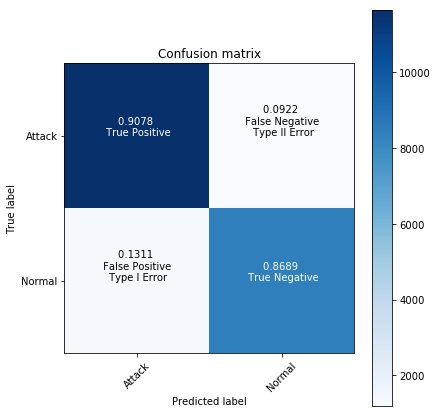

In [7]:
evaluate("dataset/tf_dense_only_nsl_kdd_predictions.pkl",
         "dataset/tf_dense_only_nsl_kdd_scores.pkl", "DenseNetwork")

# VAE with Softmax

![VAE with Softmax](images/VAE_withSoftmax.jpg)

< Explain the strategy >

Best model choosen is: Epochs:100 Number of Features:32 Hidden Layers:2
Normalized confusion matrix
[[ 0.9458  0.0542]
 [ 0.1395  0.8605]]


,epoch,no_of_features,hidden_layers,train_score,test_score
3,100,32,2,0.894503,0.909022
2,100,16,2,0.898035,0.906317
0,100,4,2,0.867156,0.885646
6,100,16,4,0.911649,0.877883
5,100,8,4,0.926057,0.871984
10,100,16,6,0.849097,0.867504
4,100,4,4,0.829927,0.861870
9,100,8,6,0.909268,0.857567
1,100,8,2,0.826751,0.852244
11,100,32,6,0.945704,0.847853


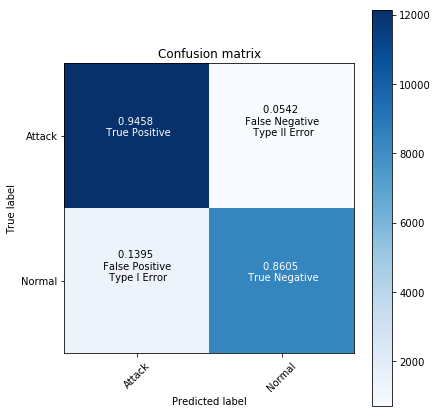

In [8]:
evaluate("dataset/tf_vae_dense_trained_together_nsl_kdd_predictions.pkl",
         "dataset/tf_vae_dense_trained_together_nsl_kdd_scores.pkl", "VAE_with_Softmax")

# VAE with Label 

![VAE with Softmax](images/VAE_withLabel.jpg)

< explain the strategy >

## using VAE Loss

< explain the variation >

Best model choosen is: Epochs:100 Number of Features:4 Hidden Layers:4
Normalized confusion matrix
[[ 0.9083  0.0917]
 [ 0.1098  0.8902]]


,epoch,no_of_features,hidden_layers,train_score,test_score
4,100,4,4,0.905620,0.900506
8,100,4,6,0.862756,0.886622
9,100,8,6,0.852278,0.885291
11,100,32,6,0.920464,0.873137
5,100,8,4,0.887442,0.863911
10,100,16,6,0.931815,0.863290
7,100,32,4,0.886649,0.862092
6,100,16,4,0.919273,0.856148
3,100,32,2,0.939197,0.855438
0,100,4,2,0.917130,0.850603


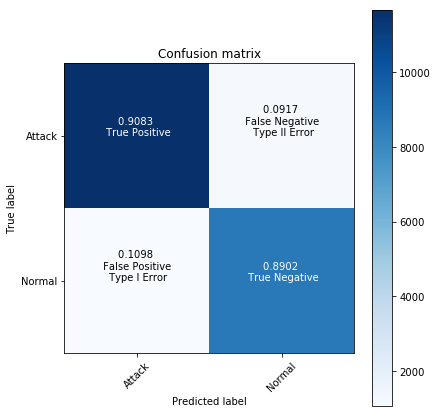

In [9]:
evaluate("dataset/tf_vae_only_vae_loss_nsl_kdd_predictions.pkl",
         "dataset/tf_vae_only_vae_loss_nsl_kdd_scores.pkl", "VAE_with_label")

## Using MSE Loss

Best model choosen is: Epochs:100 Number of Features:4 Hidden Layers:4
Normalized confusion matrix
[[ 0.9436  0.0564]
 [ 0.1529  0.8471]]


,epoch,no_of_features,hidden_layers,train_score,test_score
4,100,4,4,0.870694,0.902014
5,100,8,4,0.943880,0.888086
9,100,8,6,0.927766,0.866749
8,100,4,6,0.959994,0.843506
2,100,16,2,0.943562,0.837961
11,100,32,6,0.921337,0.837917
10,100,16,6,0.914351,0.836631
1,100,8,2,0.913161,0.832150
6,100,16,4,0.959438,0.823589
0,100,4,2,0.954517,0.821017


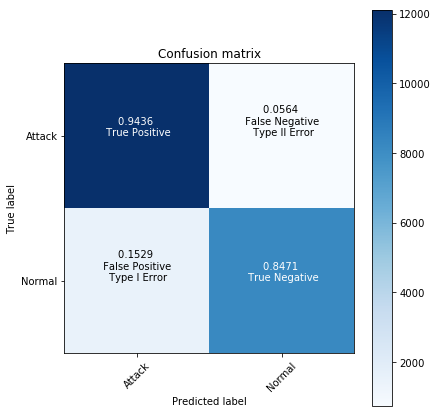

In [10]:
evaluate("dataset/tf_vae_only_nsl_kdd_predictions.pkl",
         "dataset/tf_vae_only_nsl_kdd_scores.pkl", "VAE_with_label_MSE_loss")

# Compare Results

In [11]:
accumulate_test_scores['param'] = accumulate_test_scores[['epoch','no_of_features', 'hidden_layers']].apply(lambda x : '{}_{}_{}'.format(x[0],x[1], x[2]), axis=1)

In [12]:
accumulate_test_scores = accumulate_test_scores.drop(['epoch','no_of_features', 'hidden_layers'], axis = 1)

In [13]:
accumulate_test_scores.set_index("param", inplace = True)

In [14]:
accumulate_test_scores

,DenseNetwork_test_score,VAE_with_Softmax_test_score,VAE_with_label_test_score,VAE_with_label_MSE_loss_test_score
param,,,,
100_4_2,0.827715,0.885646,0.850603,0.821017
100_8_2,0.888707,0.852244,0.801943,0.832150
100_16_2,0.847809,0.906317,0.842708,0.837961
100_32_2,0.890614,0.909022,0.855438,0.789966
100_4_4,0.806024,0.861870,0.900506,0.902014
100_8_4,0.791031,0.871984,0.863911,0.888086
100_16_4,0.891057,0.877883,0.856148,0.823589
100_32_4,0.886710,0.800967,0.862092,0.803096
100_4_6,0.727333,0.833393,0.886622,0.843506


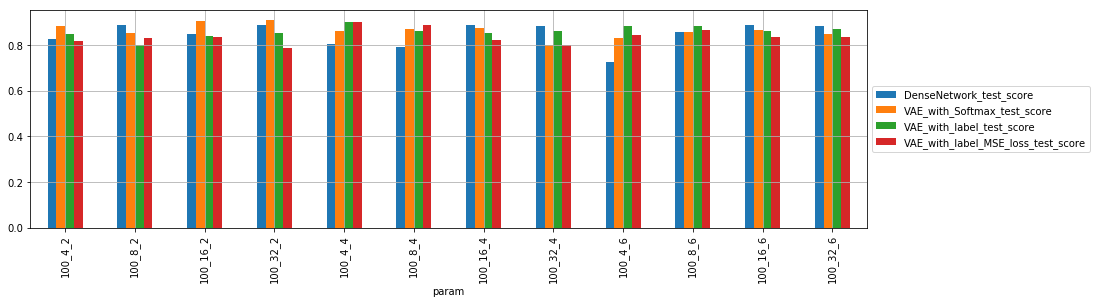

In [15]:
f = plt.figure()
accumulate_test_scores.plot(kind='bar', figsize=(15,4), ax=f.gca(),grid=True, )
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [16]:
accumulate_test_scores.to_csv("dataset/results.csv")